According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception.
The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.
In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.


The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as


Where:

\\(\epsilon\\) is the RMSLE value (score)
\\(n\\) is the total number of observations in the (public/private) data set,
\\(p_i\\) is your prediction of target, and
\\(a_i\\) is the actual target for \\(i\\).
\\(\log(x)\\) is the natural logarithm of \\(x\\)

Submission File
For every row in the test.csv, submission files should contain two columns: ID and target.  The ID corresponds to the column of that ID in the test.tsv. The file should contain a header and have the following format:

In [ ]:
###### KAGGLE DATASET -- https://www.kaggle.com/c/santander-value-prediction-challenge/overview/description

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df  = pd.read_csv('sample_submission.csv')

In [11]:
df.head()

,ID,target
0,000137c73,5.944923e+06
1,00021489f,5.944923e+06
2,0004d7953,5.944923e+06
3,00056a333,5.944923e+06
4,00056d8eb,5.944923e+06


In [6]:
df.shape

(49342, 2)

In [7]:
train_data = pd.read_csv('train.csv')

In [8]:
test_data = pd.read_csv('test.csv')

In [9]:
train_data.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [12]:
train_data.shape

(4459, 4993)

In [14]:
test_data.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
test_data.shape

(49342, 4992)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [20]:
train_data.isnull().sum().any() ####---- No missing values

False

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

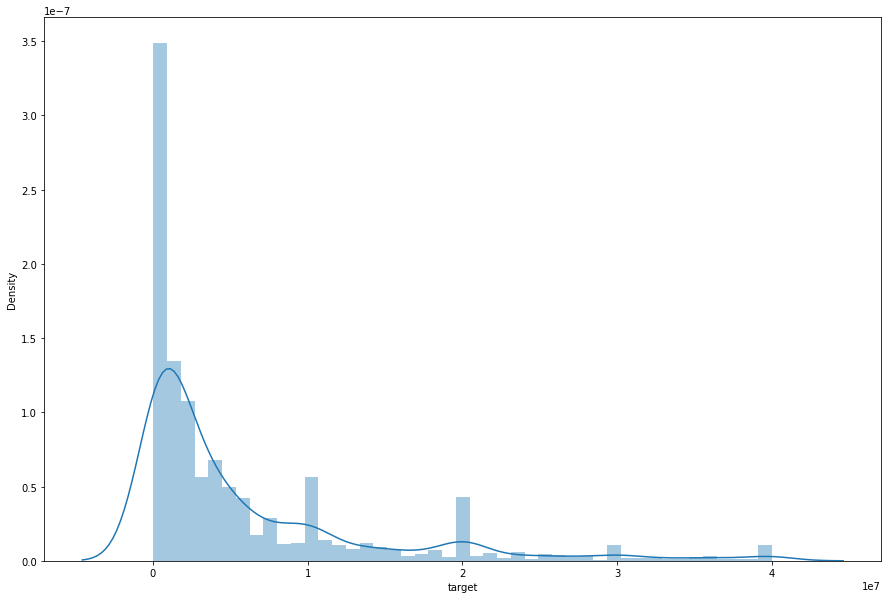

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(train_data['target'])

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

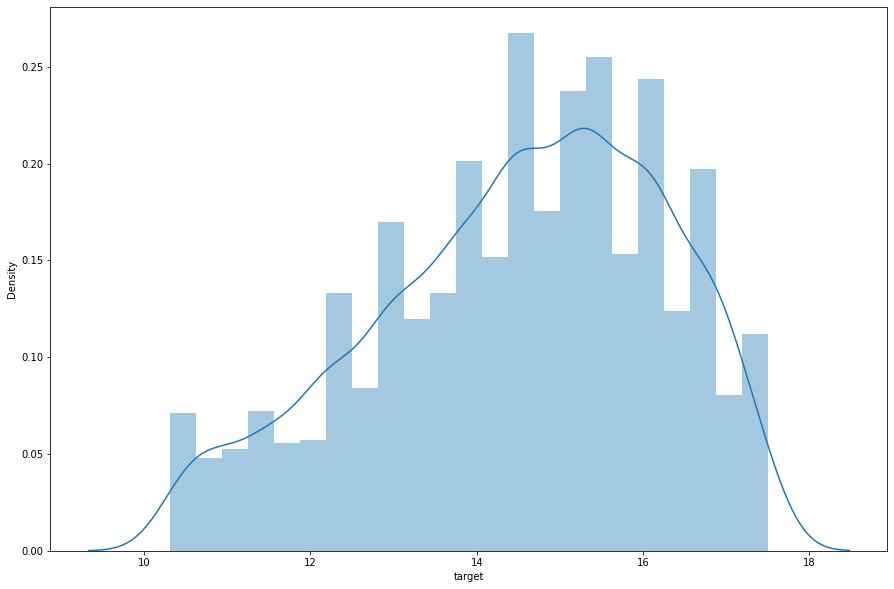

In [91]:
plt.figure(figsize=(15,10))
sns.distplot(np.log1p(train_data['target']))

In [23]:
duplicates = train_data[train_data.duplicated()]
duplicates

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466


In [86]:
X = train_data.drop(['ID','target'],axis=1)
y= np.log1p(train_data['target'])


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
from sklearn.preprocessing import StandardScaler
sm = StandardScaler()
X_train_scaled = sm.fit_transform(X_train)
X_test_scaled = sm.transform(X_test)

In [96]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled,y_train)
y_pred = abs(lm.predict(X_test_scaled))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

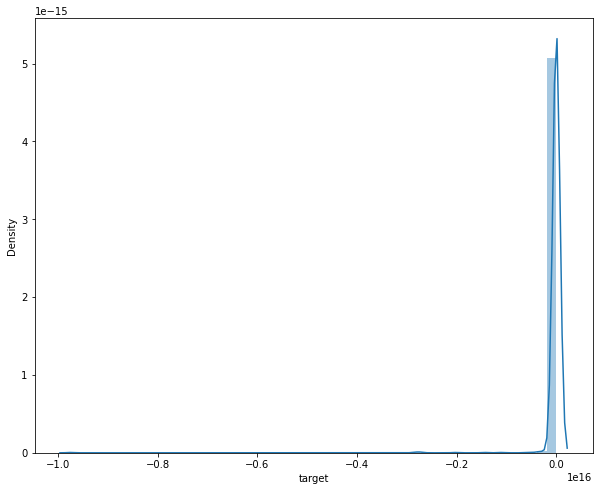

In [97]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-y_pred)

In [98]:
lm.score(X_train_scaled,y_train)

0.9986577791567219

In [99]:
lm.score(X_test_scaled,y_test)

-3.051429550415645e+28

In [100]:
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 sqyuare value -3.0514295504156393e+28
MAE: 19194794882200.86
MSE: 9.446251995187706e+28
RMSE: 307347555630229.56


############### To calculate Root Mean Squared Logarithmic Error ##############

If both predicted and actual values are small: RMSE and RMSLE are same.

If either predicted or the actual value is big: RMSE > RMSLE

If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

In [104]:
rmsle = metrics.mean_squared_log_error(y_test, y_pred)
print(rmsle)
RMSLE= np.sqrt(rmsle)
print("RMSLE",RMSLE)

363.8235972861717
RMSLE 19.074160460847857


In [42]:
############## Logistic Regression Model Failed ###########################


In [55]:
################ PCA on entire dataset ##################
from sklearn.decomposition import PCA
pca1 = PCA(n_components=10)
pca1.fit(train_data.drop(['target','ID'],axis=1))
x_pca_transformed = pca1.transform(train_data.drop(['target','ID'],axis=1))

In [56]:
####### Model building #############
X = x_pca_transformed
y = train_data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

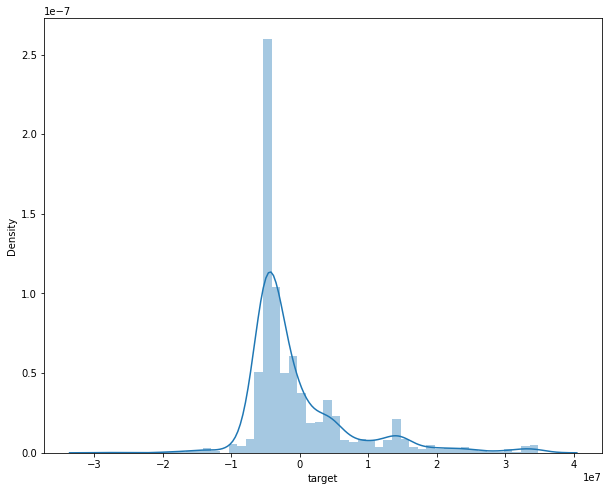

In [57]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-y_pred)

In [58]:
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 sqyuare value 0.06433497706376878
MAE: 5713512.270033668
MSE: 63171352048630.84
RMSE: 7948040.767927078


In [59]:
rmsle = metrics.mean_squared_log_error(y_test, y_pred)

In [60]:
rmsle

4.300359315995311

In [61]:
RMSLE= np.sqrt(rmsle)

In [65]:
print("RMSLE with PCA - 10 components: ",RMSLE)

RMSLE with PCA - 10 components:  2.073730772302738


In [63]:
lm.score(X_train,y_train)

0.08525285125475834

In [64]:
lm.score(X_test,y_test)

0.06433497706376878

In [105]:
X = x_pca_transformed
y = np.log1p(train_data['target'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
from xgboost import XGBRegressor
clf_xgb = XGBRegressor()
clf_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
y_pred1 = abs(clf_xgb.predict(X_test))

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

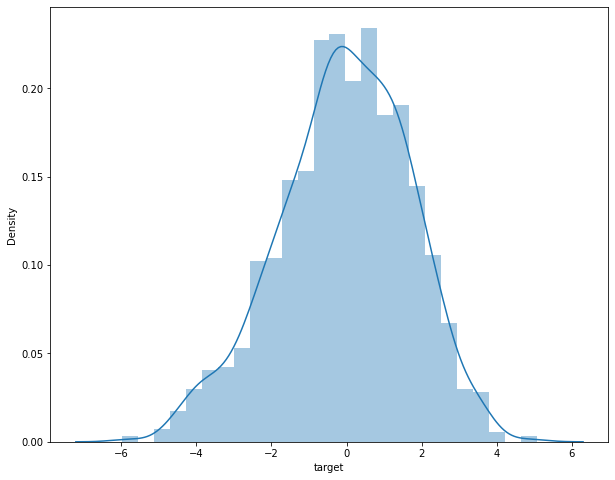

In [107]:
plt.figure(figsize=(10,8))
sns.distplot(y_test-y_pred1)

In [108]:
clf_xgb.score(X_train,y_train)

0.9150391465271803

In [109]:
clf_xgb.score(X_test,y_test)

0.02507730141215303

In [110]:
from sklearn.metrics import r2_score
re = r2_score(y_test, y_pred1)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

r2 sqyuare value 0.02507730141215303
MAE: 1.3927718354019214
MSE: 3.04050003526948
RMSE: 1.7437029664680508


In [111]:
rmsle = metrics.mean_squared_log_error(y_test, y_pred1)
RMSLE= np.sqrt(rmsle)
print("RMSLE with PCA - 10 components - XGboost regressor: ",RMSLE)

RMSLE with PCA - 10 components - XGboost regressor:  0.11713682409373856


In [112]:
final_dt = pd.DataFrame({'actual':y_test,'predicted':y_pred1},columns=['actual','predicted'])

In [115]:
final_dt.tail()

,actual,predicted
2063,14.508658,14.952072
1719,13.122365,14.301384
464,14.220976,14.766531
3845,17.399030,15.467869
3877,14.200774,14.443216
